In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import sys
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")

# Extraction

In [77]:
# Kedro Catalog
pm25_by_hour = catalog.load('pm25_by_hour')

2022-09-06 17:57:38,097 - kedro.io.data_catalog - INFO - Loading data from `pm25_by_hour` (CSVDataSet)...


In [78]:
# PM25 by Hour without Outliers
pm25_by_hour.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,YEAR,DATE,TIME,WEEKDAY,MONTH
0,2022-09-03 00:00:00-05:00,16.110169,14.990991,14.456897,16.948276,12.565217,15.051724,9.991379,3.241379,11.471154,19.461538,13.413793,12.794643,18.422414,2022,09/03/22,00:00:00,Saturday,September
1,2022-09-03 01:00:00-05:00,15.262712,13.666667,14.275862,16.389831,11.750000,14.262712,15.050847,3.786325,13.720000,26.307692,15.694915,16.076271,16.913793,2022,09/03/22,01:00:00,Saturday,September
2,2022-09-03 02:00:00-05:00,19.508475,13.444444,15.547009,15.888889,15.801724,18.775862,14.516949,4.265487,15.982301,29.008850,23.777778,17.893805,18.991525,2022,09/03/22,02:00:00,Saturday,September
3,2022-09-03 03:00:00-05:00,18.277311,15.042017,19.609524,15.635593,14.863248,18.931034,16.193277,4.034783,13.373913,26.100840,24.230769,16.152542,21.042373,2022,09/03/22,03:00:00,Saturday,September
4,2022-09-03 04:00:00-05:00,17.991667,12.543103,16.291667,14.183333,13.672414,16.470085,18.457627,2.655462,7.482456,16.630252,28.252101,10.875000,18.827586,2022,09/03/22,04:00:00,Saturday,September


# PM25 Movil 24 Hours

In [79]:
# Add DateTime string values to PM25 Data Sensors
def add_datetime_str_values(data_sensors):
    # Date value string
    data_sensors['DATE'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%x'))
    # Time value string
    data_sensors['TIME'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%T'))
    # Weekday value string
    data_sensors['WEEKDAY'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%A'))
    # Month value string
    data_sensors['MONTH'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%B'))
    # Year value string
    data_sensors['YEAR'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%Y'))
    
    return data_sensors

In [80]:
# Get data_sensors resample mean by movil 24h
def resample_pm25_movil_24h(data_sensors):
    pm25_movil_24h = {}
    # Timestamp Format
    data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
    for current_datetime in data_sensors['DATETIME'].to_list():
        last_24h = current_datetime - timedelta(hours=24)
        pm25_last_24h = data_sensors[(data_sensors['DATETIME'] <= current_datetime) & (data_sensors['DATETIME'] > last_24h)].resample('D', on='DATETIME', origin='end').mean().reset_index()
        pm25_movil_24h[current_datetime.isoformat()] = pm25_last_24h
    pm25_movil_24h = pd.concat(list(pm25_movil_24h.values())).reset_index(drop=True)
    return add_datetime_str_values(pm25_movil_24h)

In [81]:
# Resample mean by Hour
pm25_movil_24h = resample_pm25_movil_24h(pm25_by_hour)
pm25_movil_24h.tail()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,YEAR,DATE,TIME,WEEKDAY,MONTH
19,2022-09-03 19:00:00-05:00,17.397074,14.914439,15.940008,18.729051,15.986023,18.137724,15.565008,5.297657,15.811842,33.066728,27.709614,20.230784,20.410047,2022,09/03/22,19:00:00,Saturday,September
20,2022-09-03 20:00:00-05:00,16.926385,14.983677,15.905098,18.766974,15.556489,17.555632,14.895656,5.097077,15.105681,31.574179,27.225274,19.359020,20.022474,2022,09/03/22,20:00:00,Saturday,September
21,2022-09-03 21:00:00-05:00,16.493138,14.932392,15.726066,18.552763,15.274924,17.109630,14.298319,4.903207,14.483419,30.210085,26.638048,18.574635,19.496705,2022,09/03/22,21:00:00,Saturday,September
22,2022-09-03 22:00:00-05:00,16.253219,14.729997,15.474838,18.229585,15.053317,16.810920,13.815856,4.721611,13.905879,29.037907,26.024279,17.904197,19.072338,2022,09/03/22,22:00:00,Saturday,September
23,2022-09-03 23:00:00-05:00,15.868031,14.493829,15.089191,17.854522,14.915307,16.462028,13.393588,4.548845,13.372971,27.885570,25.157855,17.236267,18.577000,2022,09/03/22,23:00:00,Saturday,September


In [82]:
# Describe Data
pm25_movil_24h.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,17.587441,14.477443,15.890201,17.678581,15.132636,17.678448,15.619709,4.754197,15.347478,31.028288,25.774717,19.079052,20.026712
std,0.963367,0.526800,0.678322,1.195174,1.355429,1.321024,2.065107,0.852202,2.219005,5.800070,5.229384,3.297849,1.203302
min,15.686441,13.559441,14.366379,15.754730,12.157609,14.657218,9.991379,3.241379,11.471154,19.461538,13.413793,12.794643,17.668103
25%,16.951935,14.014127,15.734230,16.604039,14.053938,16.797024,14.208267,3.815094,13.570874,25.146304,23.531525,15.694047,19.014885
50%,17.696906,14.586611,15.963614,18.001901,15.465126,17.874630,16.084811,5.000142,15.458761,32.320453,27.375294,19.794902,20.364335
75%,18.491178,14.945213,16.271577,18.768535,16.211483,18.744226,17.426701,5.475288,17.578323,36.644202,29.621779,22.291967,21.065652
max,18.713172,15.115390,16.835463,19.095598,16.874580,19.279962,18.008638,5.775722,17.961220,37.793043,31.501931,22.911795,21.550515


In [83]:
# Plot Histograms
def histplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Histograms - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.histplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

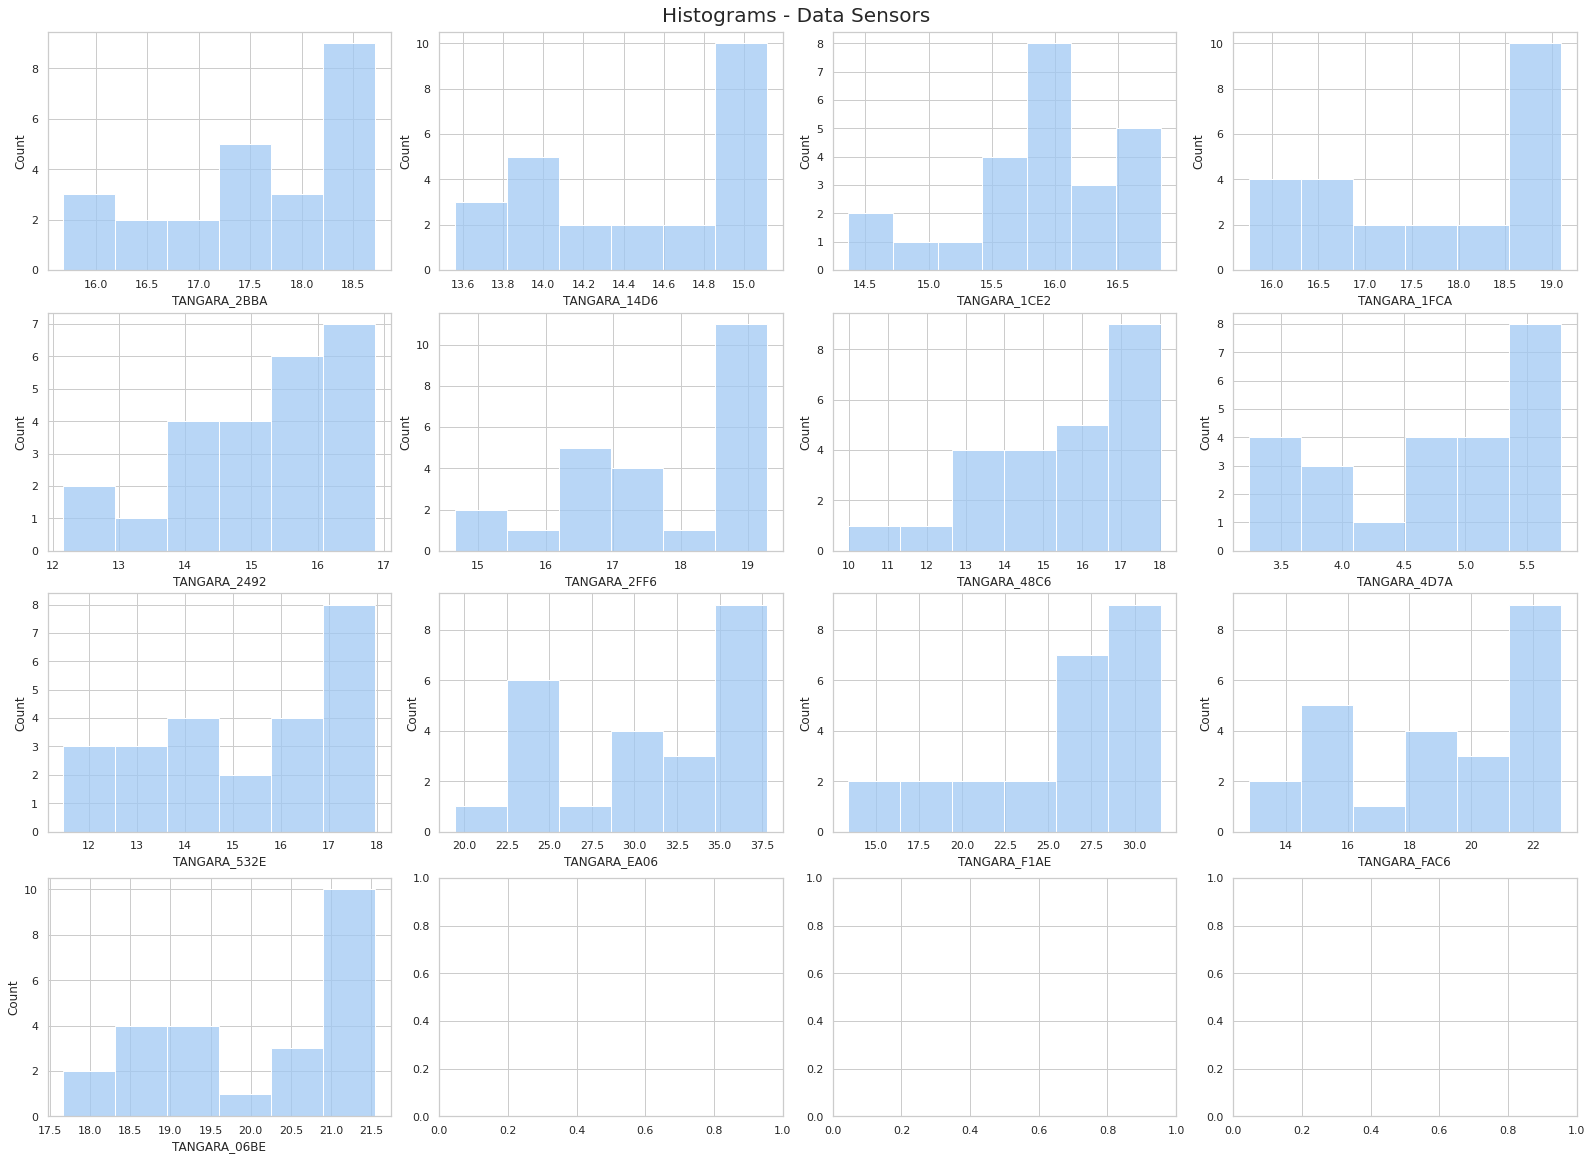

In [84]:
# Plot Histogramas
histplots(pm25_movil_24h)

In [85]:
# Plot Boxplots
def boxplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Boxplots - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.boxplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]], orient="h", x=data_sensors[data_sensors.columns[k]])
            k += 1

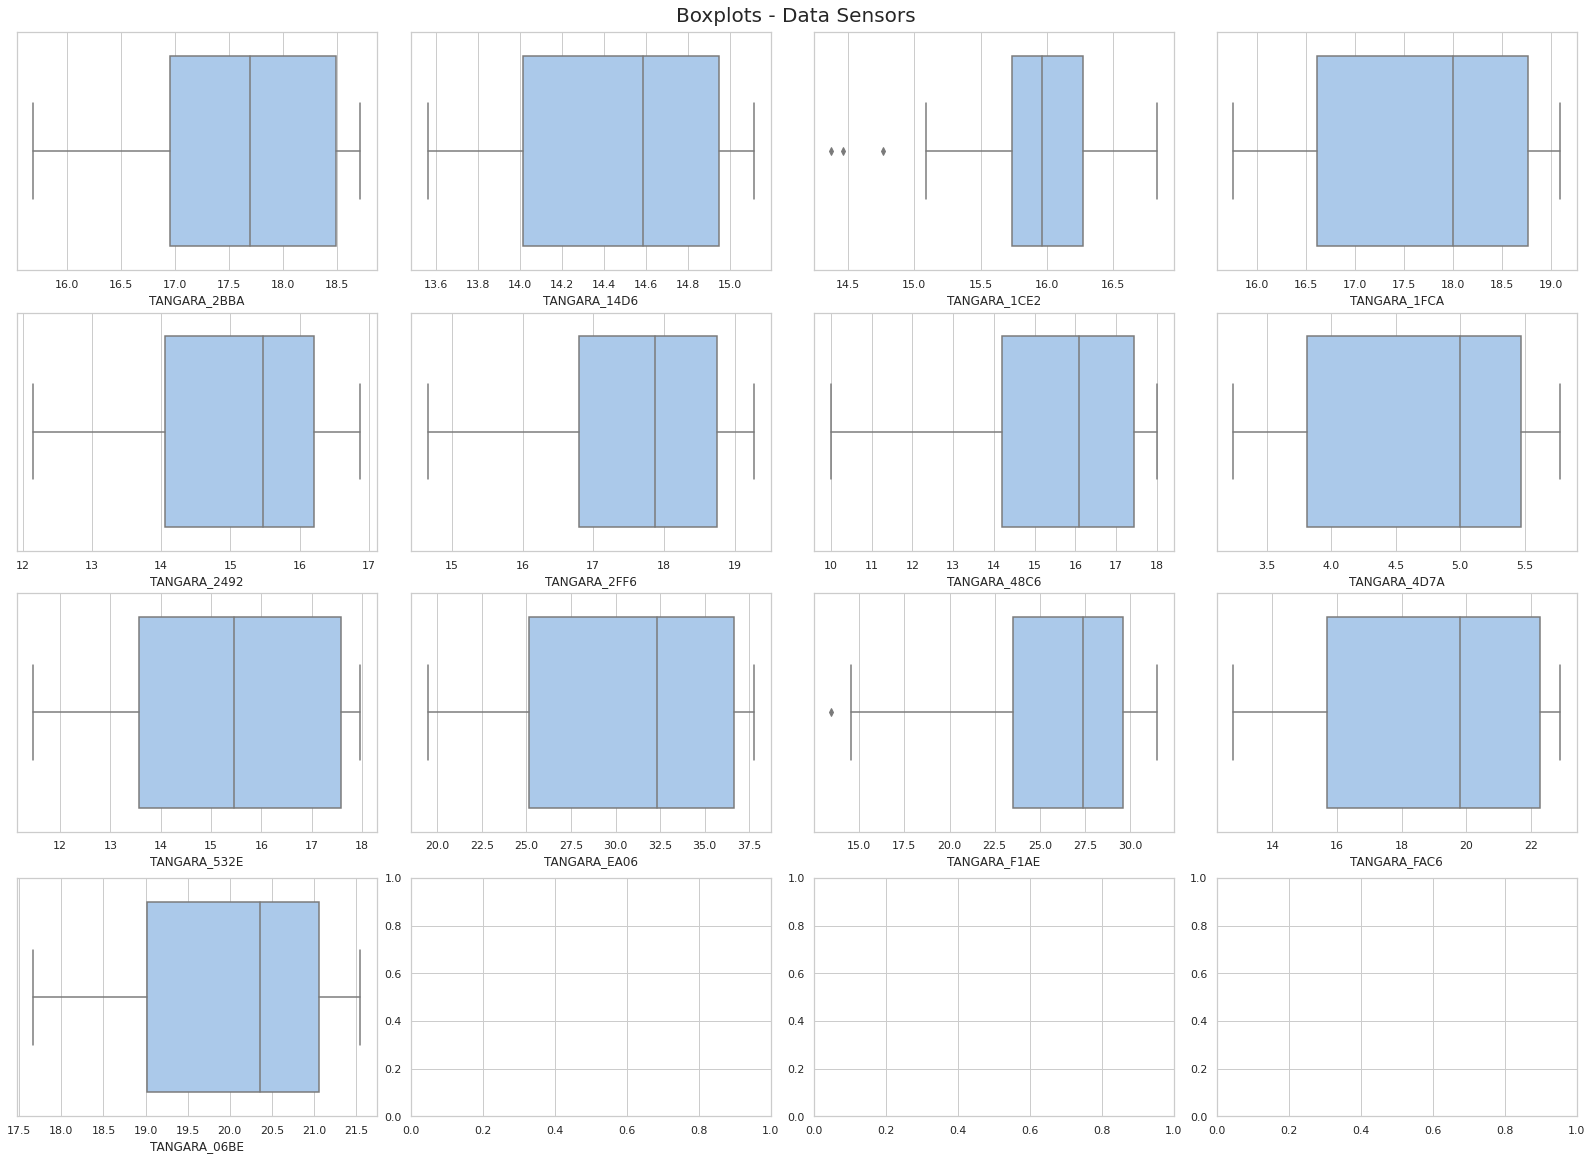

In [86]:
# Plot Boxplots
boxplots(pm25_movil_24h)

In [87]:
# Plot Lineplots
def lineplots(data_sensors):
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)

    fig.suptitle('Timeline - Data Sensors', fontsize=20)

    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.lineplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

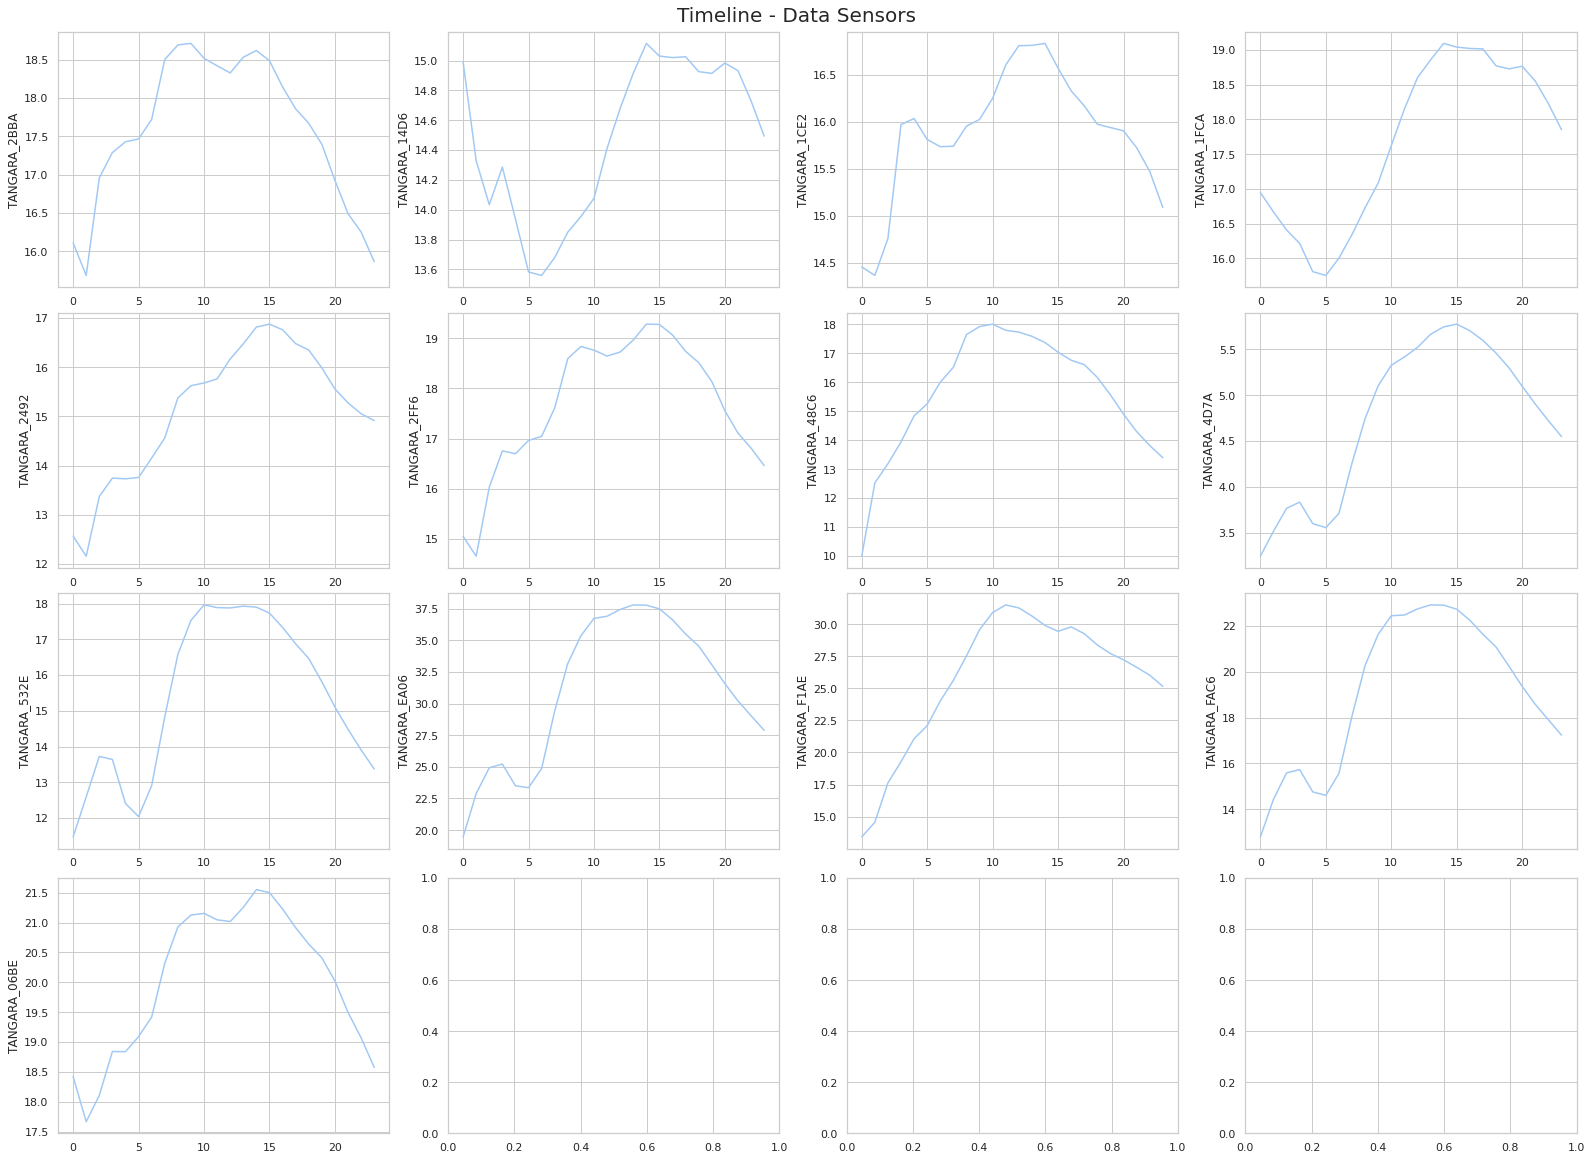

In [88]:
# Plot Lineplots
lineplots(pm25_movil_24h)

In [89]:
#pm25_by_hour[(pm25_by_hour['DATETIME'] <= '2022-09-04T23:59:59-05:00') & (pm25_by_hour['DATETIME'] > '2022-09-04T00:00:00-05:00')].resample('D', on='DATETIME', origin='end').mean().reset_index()

In [90]:
# Save pm25_movil_24h into Catalog
catalog.save('pm25_movil_24h', pm25_movil_24h)

2022-09-06 17:58:04,097 - kedro.io.data_catalog - INFO - Saving data to `pm25_movil_24h` (CSVDataSet)...
